In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from data_augmentation import *
from data_loading import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
clip_length = 30
jam_ratio = 0.75
min_jam_length = 5
min_non_jam_length = 5

In [6]:
df = load_FCD(get_path())

Loading took 85.69 seconds
Data frame has shape (22558642, 9)


In [7]:
df = calculate_speeds(df)

NaNs before:
measurementSiteReference           0
periodStart                        0
dataError                          0
avgVehicleSpeed             22558642
avgTravelTime                5721179
lengthAffected                     0
referenceAvgVehicleSpeed    22558642
referenceAvgTravelTime        493864
timeOfDay                          0
dtype: int64

NaNs after:
measurementSiteReference    0
periodStart                 0
dataError                   0
avgVehicleSpeed             0
avgTravelTime               0
lengthAffected              0
referenceAvgVehicleSpeed    0
referenceAvgTravelTime      0
timeOfDay                   0
ratioReference              0
dtype: int64
Dropping columns: ['referenceAvgVehicleSpeed', 'avgTravelTime', 'referenceAvgTravelTime', 'lengthAffected']


/usr/local/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


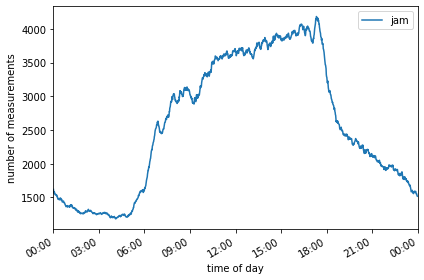

Number of jams (1 = jam)
0    18837256
1     3721386
Name: isJam, dtype: int64


In [8]:
df = annotate_jams(df, jam_ratio=jam_ratio)

In [9]:
df_before_merge = calculate_ttes(df, is_jam_column="isJam")
df_before_merge = clip_tte(df_before_merge, clip_length=clip_length)

Dropping columns: ['isNotJam']


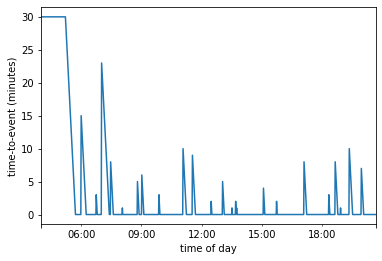

In [10]:
df_before_merge[df_before_merge["measurementSiteReference"] == "PZH03_N206-1_e-1"].reset_index(drop=True)[6000:7000].plot(x="periodStart", y="timeToJamClipped", legend=None)
plt.xlabel("time of day")
plt.ylabel("time-to-event (minutes)")
plt.savefig("../thesis/figures/tte_before_filtering.pdf")
plt.show()

Calculating jam lengths.
Dropping columns: ['isNotJam', 'cumulativeLocalJamLength', 'cumulativeLocalNonJamLength']
Most common non-jam length: 1 minutes


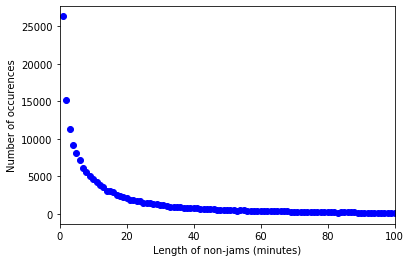

Most common jam length: 1 minutes


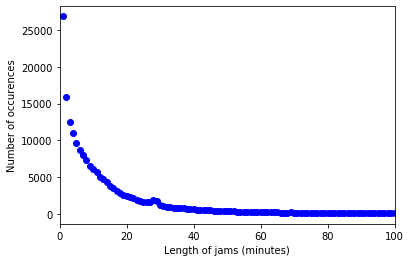

Number of jams before merging:
0    18837256
1     3721386
Name: isJam, dtype: int64
Merging close jams.
Number of jams after merging:
0    18709679
1     3848963
Name: isJamCleaned, dtype: int64
Recalculating jam lengths.
Dropping columns: ['isNotJam', 'cumulativeLocalJamLength', 'cumulativeLocalNonJamLength']
Most common non-jam length: 5 minutes


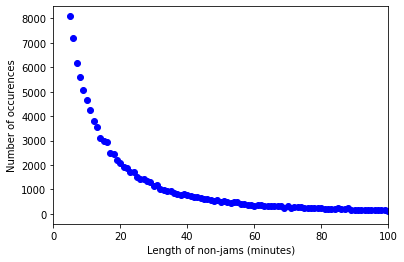

Most common jam length: 1 minutes


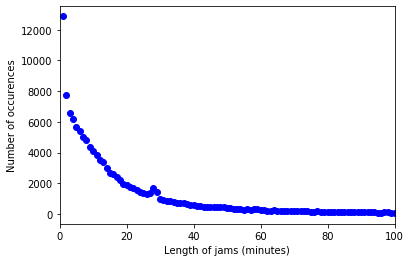

Number of jams before discarding:
0    18709679
1     3848963
Name: isJamCleaned, dtype: int64
Discarding short jams.
Number of jams after discarding:
0    18782502
1     3776140
Name: isJamCleaned, dtype: int64


In [11]:
df_after_merge = df_before_merge.copy()
df_after_merge = merge_jams(df_after_merge, min_non_jam_length=min_non_jam_length, min_jam_length=min_jam_length, show_final_statistics=False)

In [12]:
df_after_merge = calculate_ttes(df_after_merge, is_jam_column="isJamCleaned")
df_after_merge = clip_tte(df_after_merge, clip_length=clip_length)

Dropping columns: ['isNotJam']


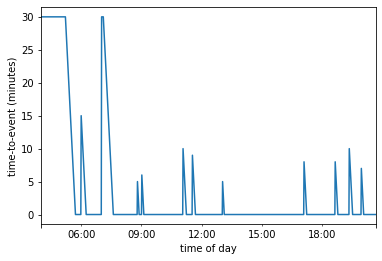

In [13]:
df_after_merge[df_after_merge["measurementSiteReference"] == "PZH03_N206-1_e-1"].reset_index(drop=True)[6000:7000].plot(x="periodStart", y="timeToJamClipped", legend=None)
plt.xlabel("time of day")
plt.ylabel("time-to-event (minutes)")
plt.savefig("../thesis/figures/tte_after_filtering.pdf")
plt.show()